In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def add_block_noise(image, noise_factor, block_size):
    """Adds block-wise random noise to the image.

    Args:
        image: The grayscale image as a numpy array.
        noise_factor: A scalar controlling the intensity of the noise.
        block_size: A tuple representing the size of noise blocks (height, width).

    Returns:
        The noisy image as a numpy array.
    """
    h, w = image.shape
    noisy_img = image.copy()
    for _ in range(5):  # Adjust number of blocks for desired density
        rand_x, rand_y = np.random.randint(0, h - block_size[0] + 1), np.random.randint(
            0, w - block_size[1] + 1
        )
        noisy_img[rand_x : rand_x + block_size[0], rand_y : rand_y + block_size[1]] += (
            np.random.rand(*block_size) * noise_factor
        )
    return noisy_img


def threshold_denoise(image, window_size, threshold):
    """Applies thresholding for denoising.

    Args:
        image: The image to be denoised.
        window_size: Size of the local neighborhood window.
        threshold: Threshold for considering a pixel as noise.

    Returns:
        The denoised image.
    """
    h, w = image.shape
    denoised_img = image.copy()
    pad_size = window_size // 2  # Padding for border pixels
    padded_img = np.pad(image, pad_width=pad_size, mode="edge")
    for i in range(pad_size, h + pad_size):
        for j in range(pad_size, w + pad_size):
            window = padded_img[
                i - pad_size : i + pad_size + 1, j - pad_size : j + pad_size + 1
            ]
            local_mean = np.mean(window)
            if abs(denoised_img[i - pad_size, j - pad_size] - local_mean) > threshold:
                denoised_img[i - pad_size, j - pad_size] = local_mean
    return denoised_img

In [5]:
img = Image.open("ny.png")
gray_img = np.mean(img, 2)

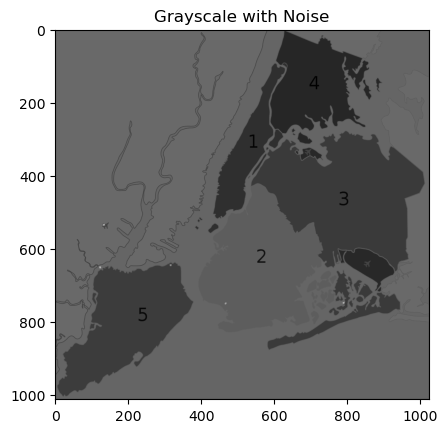

In [9]:
# Add block noise with larger block size and fewer iterations
noisy_img = add_block_noise(
    gray_img.copy(), 200, block_size=(5, 5)
)  # Adjust block_size and noise_factor
plt.imshow(noisy_img, cmap="gray")
plt.title("Grayscale with Noise")
plt.show()

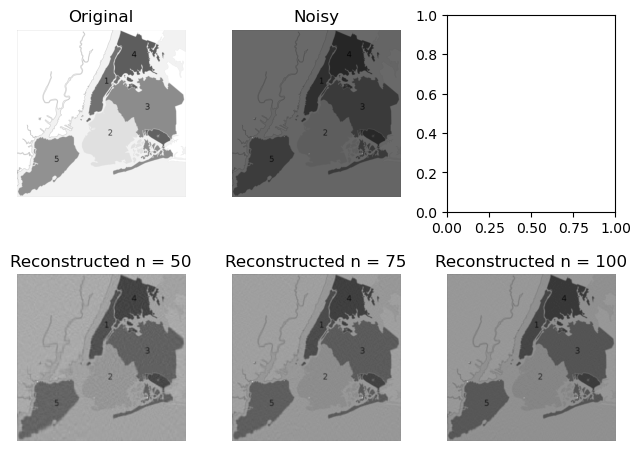

In [10]:
U, s, V = np.linalg.svd(noisy_img)

# Try a range of values for n (number of singular values)
n_values = [50, 75, 100]  # Adjust n values for experimentation

denoised_images = []
for n in n_values:
    S = np.zeros(np.shape(gray_img))
    for i in range(0, n):
        S[i, i] = s[i]
    reconstructed_img = U @ S @ V
    denoised_img = threshold_denoise(
        reconstructed_img.copy(), window_size=5, threshold=1
    )  # Adjust window_size and threshold
    denoised_images.append(denoised_img)

fig, axes = plt.subplots(2, len(n_values))

axes[0, 0].imshow(gray_img, cmap="gray")
axes[0, 0].axis("off")
axes[0, 0].set_title("Original")

axes[0, 1].imshow(noisy_img, cmap="gray")
axes[0, 1].axis("off")
axes[0, 1].set_title("Noisy")

for i, n in enumerate(n_values):
    axes[1, i].imshow(denoised_images[i], cmap="gray")
    axes[1, i].axis("off")
    axes[1, i].set_title(f"Reconstructed n = {n}")

plt.tight_layout()
plt.show()